## Softmax 

In [1239]:
# Data loading

from mnist import MNIST

mndata = MNIST('data')
training_set = mndata.load_training()
test_set = mndata.load_testing()

#### training data
inputs = np.array(training_set[0])
dim = len(training_set[0][0])+1
size = len(training_set[1])
targets = np.zeros((10, size))
targets[training_set[1], range(size)] = 1

inputs1=inputs[:18000,:]
targets1=targets[:,:18000]
inputs2=np.ones((inputs1.shape[0],inputs1.shape[1]+1))
inputs2[:,1:]=inputs1
print(inputs2.shape, targets1.shape)

#### hold_out data
hold_inputs=inputs[18000:20000,:]
hold_targets=targets[:,18000:20000]
hold_inputs2=np.ones((hold_inputs.shape[0],hold_inputs.shape[1]+1))
hold_inputs2[:,1:]=hold_inputs
print(hold_inputs2.shape, hold_targets.shape)

#### testing data
test_inputs = np.array(test_set[0])
test_size = len(testing_set[1])
test_targets = np.zeros((10, test_size))
test_targets[test_set[1], range(test_size)] = 1

test_inputs=test_inputs[:2000,:]
test_targets=test_targets[:,:2000]
test_inputs2=np.ones((test_inputs.shape[0],test_inputs.shape[1]+1))
test_inputs2[:,1:]=test_inputs
print(test_inputs2.shape, test_targets.shape)

epochs=200

(18000, 785) (10, 18000)
(2000, 785) (10, 2000)
(2000, 785) (10, 2000)


In [1273]:
import numpy as np

class Softmax(object):
    def __init__(self, dim, inputs, targets, lamb, c=10):
        self.weight = np.zeros((dim,c))
        self.inputs = inputs
        self.targets = targets
        self.lamb = lamb
    
    def activation_function(self, z):
        return np.exp(z) / np.sum(np.exp(z),axis=0)
    
    def gradient(self):
        t = self.targets
        y = self.output() # C*N
        x = self.inputs
        return ((-(np.matrix(t) -np.matrix(y))* (np.matrix(x))).T+2*self.weight)
    
    def loss_function(self):
        t = self.targets
        y = np.array(self.output())
        L2=self.lamb*np.sum(np.power(self.weight,2))
        return float((-np.sum(np.nan_to_num(t* np.log(y)))+L2)/inputs.shape[0])

    def output(self):
        f = self.activation_function
        w = self.weight
        x = self.inputs
        return f(np.matmul(x, w).T)
    
    def update(self, rate):
        self.weight = self.weight - rate * self.gradient()

In [1279]:
nn = Softmax(dim, inputs2, targets1, lamb=0.1)

In [1280]:
train_loss=[]
train_cor=[]
hold_loss=[]
hold_cor=[]
test_loss=[]
test_cor=[]
epochs=100
for i in range(epochs):   
    nn.inputs=inputs2
    nn.targets=targets1
    nn.update(rate=0.000000005)
    train_loss+=[nn.loss_function()]
    train_cor+=[np.sum(np.argmax(nn.output(),axis=0)==np.argmax(nn.targets,axis=0))/inputs.shape[0]]
#### hold_out
    nn.inputs=hold_inputs2
    nn.targets=hold_targets
    hold_loss+=[nn.loss_function()]
    hold_cor+=[np.sum(np.argmax(nn.output(),axis=0)==np.argmax(nn.targets,axis=0))/inputs.shape[0]]
#### testing
    nn.inputs=test_inputs2
    nn.targets=test_targets
    test_loss+=[nn.loss_function()]
    test_cor+=[np.sum(np.argmax(nn.output(),axis=0)==np.argmax(nn.targets,axis=0))/inputs.shape[0]]

In [1271]:
nn.inputs.shape

(2000, 785)

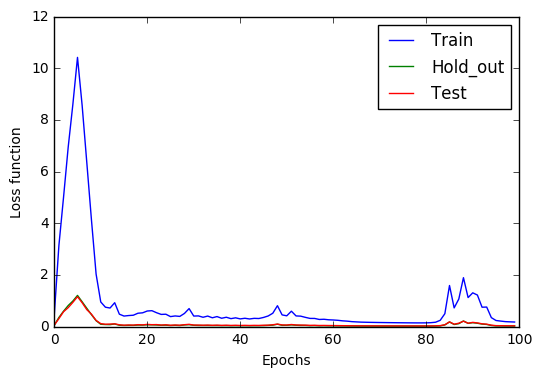

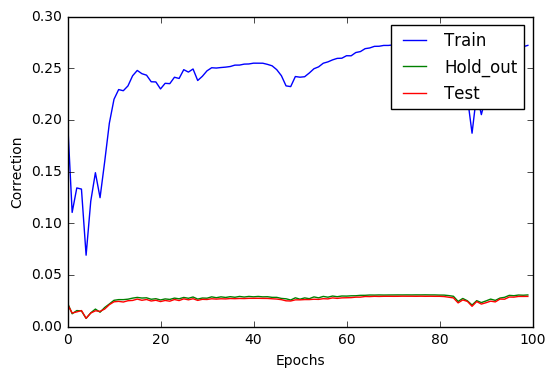

In [1281]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(epochs),train_loss,label='Train');
plt.plot(range(epochs),hold_loss,label='Hold_out');
plt.plot(range(epochs),test_loss,label='Test');
plt.legend()
plt.xlabel('Epochs');
plt.ylabel('Loss function')
plt.plot()

plt.figure()
plt.plot(range(epochs),train_cor,label='Train');
plt.plot(range(epochs),hold_cor,label='Hold_out');
plt.plot(range(epochs),test_cor,label='Test');
plt.legend()
plt.xlabel('Epochs');
plt.ylabel('Correction')